# BioE HW 6

## Align the reads to the human genome ##
Map the reads from sequence of interest to human genome first to remove contamination.

- The database would be human genome: hg19

- The input reads would be the reads from sequence of interest: illumina_reads.fastq

- The output is stored as: human_output.sam 

- The unaligned file is stored as: unaligned_human.fastq, which stores the sequence that doesn't match with human genome

The terminal commands and the output are displayed in the following picture:

![1](1.png)

From the output, we can see that the alignment rate is 8.57%, which means that 91.43% of the sequence should match with bacteria and contamination other than human genome if any.


## Align the reads to the S. oneidensis reference genome
- The database would be the S. oneidensis MR-1 reference genome

- The input file would be the unaligned sequence free of human genome obtained above: unaligned_human.fastq

- The output is stored as: bacteria_output.sam

- The unaligned file would be the sequence doesn't match with either human or bacteria genome: unaligned_bacteria.fastq (this contains contamination other than human genome)

The terminal commands and output using 'very fast' are displayed below:

![2](2.png)

From the output results, we can see that 29.13% doesn't align to the reference bacteria genome.

The terminal commands and output using 'very sensitive' are displayed below:

![3](3.png)

From the output results, we can see the percentage changes to 28.99%. The decrease in percentage means that more matches are found due to an increase in sensitivity.



## Generate a coverage plot
To create a file containing the depth of coverage for every position in the reference genome:

- step 1: Convert bacteria_output.sam (alignment of filtered reads to the bacteria genome) to BAM
    
    
    samtools view -b bacteria_output.sam > bacteria_output.bam


- step 2: Sort BAM file


    samtools sort bacteria_output.bam > bacteria_output.sorted.bam
    
    
- step 3: Index BAM file


    samtools index bacteria_output.sorted.bam


- step 4: Depth of BAM file: generate a list of coordinates and the number of times a read aligned to that position


    samtools depth -a bacteria_output.sorted.bam > pileup.tab

In [16]:
import matplotlib.pyplot as plt
import numpy as np

f = open('pileup.tab','r')
positions = []
coverages = []
for line in f.readlines():
    position = int(line.split()[1])
    coverage = int(line.split()[2])
    positions.append(position)
    coverages.append(coverage)    
f.close()
print('The min coverage across all positions is: ',min(coverages))
print('The max coverage across all positions is: ',max(coverages))
print('The mean coverage across all positions is: ',np.mean(coverages))

The min coverage across all positions is:  0
The max coverage across all positions is:  281
The mean coverage across all positions is:  37.03830306625343


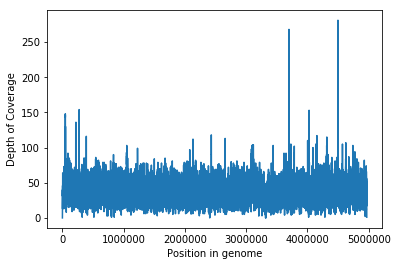

In [17]:
plt.plot(positions, coverages)
plt.xlabel('Position in genome')
plt.ylabel('Depth of Coverage')
plt.show()

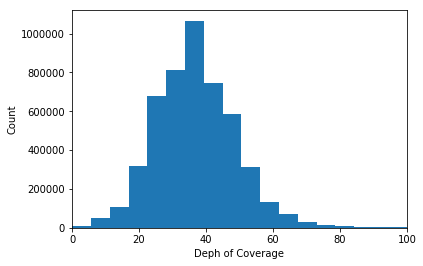

In [18]:
n_bins = 50
plt.hist(coverages, bins=n_bins)
plt.xlabel('Deph of Coverage')
plt.ylabel('Count')
plt.xlim([0,100])
plt.show()